In [1]:
!pip install xlrd
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('210525_Aspergillus_niger_3HP_ABFSF93_multiomics_data_fixed.xlsx').iloc[:, :12]
df.iloc[50, 6] = 10.8776119402985

In [4]:
## day 0 biomass ~ 0.5 g/L

In [5]:
df.columns

Index(['Omics Sample ID', 'Strain (ICE)', 'Genotype',
       'Day 3 Glucose converted (g/L)', 'Day 5 Glucose converted (g/L)',
       'Day 7 Glucose converted (g/L)', 'Day 3 Biomass (g/L)',
       'Day 5 Biomass (g/L)', 'Day 7 Biomass (g/L)', 'Day 3 3HP (g/L)',
       'Day 5 3HP (g/L)', 'Day 7 3HP (g/L)'],
      dtype='object')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.lineplot

<function seaborn.relational.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)>

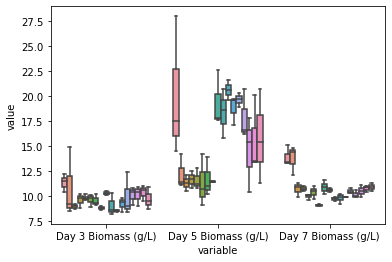

In [8]:
ax = sns.boxplot(x='variable', y='value', data=df.melt(id_vars=['Omics Sample ID', 'Strain (ICE)'], value_vars=['Day 3 Biomass (g/L)', 'Day 5 Biomass (g/L)', 'Day 7 Biomass (g/L)']), hue='Strain (ICE)')
ax.legend_.set_visible(False)

In [90]:
biomass_concentrations = df.melt(id_vars=['Strain (ICE)'], value_vars=['Day 3 Biomass (g/L)', 'Day 5 Biomass (g/L)', 'Day 7 Biomass (g/L)']
                                ).groupby('Strain (ICE)').median()

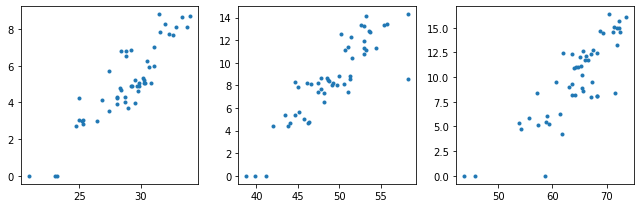

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(9,3))
ax[0].plot(df['Day 3 Glucose converted (g/L)'], df['Day 3 3HP (g/L)'], '.')
ax[1].plot(df['Day 5 Glucose converted (g/L)'], df['Day 5 3HP (g/L)'], '.')
ax[2].plot(df['Day 7 Glucose converted (g/L)'], df['Day 7 3HP (g/L)'], '.')

plt.tight_layout()

In [61]:
np.log(df['Day 3 Biomass (g/L)'] / 0.5) / 72

0     0.044352
1     0.042139
2     0.043531
3     0.047123
4     0.039356
5     0.040425
6     0.040535
7     0.040227
8     0.039690
9     0.041304
10    0.041936
11    0.039907
12    0.041255
13    0.041856
14    0.041146
15    0.041390
16    0.041772
17    0.040105
18    0.040698
19    0.041947
20    0.040385
21    0.039618
22    0.039893
23    0.040195
24    0.042291
25    0.041985
26    0.041764
27    0.038924
28    0.039537
29    0.042100
30    0.039282
31    0.039378
32    0.039612
33    0.041366
34    0.039228
35    0.040848
36    0.039235
37    0.044643
38    0.040185
39    0.042132
40    0.042769
41    0.040385
42    0.042844
43    0.042200
44    0.040149
45    0.042412
46    0.040977
47    0.043010
48    0.039771
49    0.040871
50    0.042776
51         NaN
52         NaN
Name: Day 3 Biomass (g/L), dtype: float64

In [73]:
initial_biomass = .5
df['growth_rate'] = (np.log(df['Day 5 Biomass (g/L)'] / initial_biomass) / (24*5))

In [74]:
# df['growth_rate'] = (np.log(df['Day 5 Biomass (g/L)'] / df['Day 3 Biomass (g/L)']) / 48)

In [75]:
df['growth_rate']

0     0.029609
1     0.033529
2     0.028076
3     0.027875
4     0.026072
5     0.025848
6     0.025967
7     0.025422
8     0.026580
9     0.026256
10    0.025631
11    0.026826
12    0.025949
13    0.025651
14    0.027022
15    0.025563
16    0.027881
17    0.024240
18    0.027694
19    0.025176
20    0.025759
21    0.026056
22    0.026156
23    0.026104
24    0.029751
25    0.029691
26    0.031768
27    0.031020
28    0.028767
29    0.030119
30    0.031377
31         NaN
32    0.030586
33    0.030561
34    0.029425
35    0.030623
36    0.030266
37    0.030878
38    0.030632
39    0.031042
40    0.029198
41    0.029001
42    0.028545
43    0.025298
44    0.029793
45    0.027388
46    0.030792
47    0.027497
48    0.028590
49    0.026038
50    0.031038
51         NaN
52         NaN
Name: growth_rate, dtype: float64

In [76]:
len(df['Strain (ICE)'].unique())

18

In [77]:
colors = sns.color_palette(palette='husl', n_colors=18)

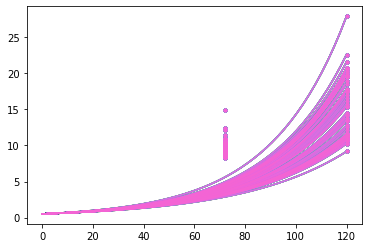

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

for (strain, idf), color in zip(df.groupby('Strain (ICE)'), colors):
    ax.plot(5 * 24 *np.ones(len(df)), df['Day 5 Biomass (g/L)'], '.', label=strain, color=color, zorder=2)
    ax.plot(72 * np.ones(len(df)), df['Day 3 Biomass (g/L)'], '.', label=strain, color=color, zorder=2)
    
    for _, row in df.iterrows():
        ts = np.linspace(0, 5 * 24)
        plt.plot(ts, initial_biomass * np.exp(ts * row['growth_rate']), color=color, zorder=1, alpha=0.5)

Using equations from [monod kinetics](https://www.cs.montana.edu/webworks/projects/stevesbook/contents/chapters/chapter002/section002/black/page001.html)

We're looking for the the cell-specific rate,  $$\frac{1}{X} \frac{dS}{dt} = \frac{\mu}{Y} = \frac{\Delta \mathrm{substrate}}{\Delta \mathrm{cell\ mass}}\mu$$

We also want rates in mmol/g CDW * hr, which is the typical unit for FBA modeling; so we need to divide the g/L by the molar mass and multiply by 1000

In [79]:
df['glucose_uptake_rates (mmol/gDCW * hr)'] = 1000 * (df['Day 5 Glucose converted (g/L)'] / 180.156) / (df['Day 5 Biomass (g/L)'] - initial_biomass)
df['3hp_secretion_rates (mmol/gDCW * hr)'] = 1000 * (df['Day 5 3HP (g/L)'] / 90.08) / (df['Day 5 Biomass (g/L)'] - initial_biomass)

In [80]:
df[['Omics Sample ID', 'Strain (ICE)', 'Genotype', 'growth_rate', 'glucose_uptake_rates (mmol/gDCW * hr)', '3hp_secretion_rates (mmol/gDCW * hr)']].to_csv('a.niger_strain_specific_rates.csv', index=False)

In [ ]:
df['glucose_uptake_rates (mmol/gDCW * hr)'] = 1000 * (df['Day 5 Glucose converted (g/L)'] / 180.156)
df['3hp_secretion_rates (mmol/gDCW * hr)'] = 1000 * (df['Day 5 3HP (g/L)'] / 90.08) / (df['Day 5 Biomass (g/L)'] - initial_biomass)

In [123]:
# glucose_mass_7 = (df['Day 7 Glucose converted (g/L)'] - df['Day 5 Glucose converted (g/L)']) / 48 # mmol*hr
# glucose_mmol_hr_7 = glucose_mass_7 * 1000 / 180.156
# glucose_mmol_dcw_hr_7 = glucose_mmol_hr_7 / biomass_concentrations.reindex(df['Strain (ICE)']).values.flatten()


# glucose_mass_5 = (df['Day 5 Glucose converted (g/L)'] - df['Day 3 Glucose converted (g/L)']) / 48
# glucose_mmol_hr_5 = glucose_mass_5 * 1000 / 180.156
# glucose_mmol_dcw_hr_5 = glucose_mmol_hr_5 / biomass_concentrations.reindex(df['Strain (ICE)']).values.flatten()

glucose_mass_3 = (df['Day 7 Glucose converted (g/L)'] - df['Day 3 Glucose converted (g/L)']) / 96
glucose_mmol_hr_3 = glucose_mass_3 * 1000 / 180.156
glucose_mmol_dcw_hr_3 = glucose_mmol_hr_3 / biomass_concentrations.reindex(df['Strain (ICE)']).values.flatten()

In [124]:
hp_mass_3 = (df['Day 7 3HP (g/L)'] - df['Day 3 3HP (g/L)']) / 96
hp_mmol_hr_3 = hp_mass_3 * 1000 / 180.156
hp_mmol_dcw_hr_3 = hp_mmol_hr_3 / biomass_concentrations.reindex(df['Strain (ICE)']).values.flatten()

In [128]:
df['glucose_uptake_rates (mmol/gDCW * hr)'] = glucose_mmol_dcw_hr_3
df['3hp_secretion_rates (mmol/gDCW * hr)'] = hp_mmol_dcw_hr_3

In [132]:
df[['Omics Sample ID', 'Strain (ICE)', 'Genotype', 'glucose_uptake_rates (mmol/gDCW * hr)', '3hp_secretion_rates (mmol/gDCW * hr)']].dropna().to_csv('a.niger_no_growth_specific_rate.csv', index=False)